## Explore geo_em plots

In [22]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import wrf
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap

#### Load variables for each experiment

'LU_index' for each experiment as well as an example that uses w2w.

In [23]:
usgs_file = nc.Dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/usgs/geo_em.d04.nc')
usgs_var = wrf.getvar(usgs_file, 'LU_INDEX')
lat, lon = wrf.latlon_coords(usgs_var)
cart_proj = wrf.get_cartopy(usgs_var)

wur_file = nc.Dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur/geo_em.d04.nc')
wur_var = wrf.getvar(wur_file, 'LU_INDEX')

wur_lcz_file = nc.Dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur_lcz/geo_em.d04.nc')
wur_lcz_var = wrf.getvar(wur_lcz_file, 'LU_INDEX')

modis_file = nc.Dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/modis_lcz/geo_em.d04.nc')
modis_var = wrf.getvar(modis_file, 'LU_INDEX')

w2w_file = nc.Dataset('/home/cdonnely/Urban-M4/experiments/2024-06-18_15-39-48/geo_em.d04.nc')
w2w_var = wrf.getvar(w2w_file, 'LU_INDEX')

#### Colour scale for USGS (24) and Modis (61)

In [24]:
c_modis = [
    [0.43, 0.89, 1.0],
    [0.67, 0.94, 1.0],
    [1.0, 0.77, 0.89],
    [1.0, 0.6, 0.8],
    [1.0, 0.0, 1.0],
    [0.50, 0.0, 0.50],
    [0.0, 0.0, 0.50],
    [0.27, 0.27, 1.0],
    [0.2, 0.4, 1.0],
    [0.52, 0.64, 1.0],
    [1.0, 1.0, 1.0],  # URBAN IN ORIGINAL FILE
    [0.8, 0.8, 0.8],
    [0.70, 0.70, 0.70],
    [0.0, 0.0, 0.0],
    [0.6, 0.6, 0.6],
    [0.35, 0.35, 0.35],
    [0.50, 0.50, 0.0],
    [0.0, 0.36, 0.0],
    [0.0, 0.50, 0.0],
    [0.2, 0.6, 0.4],
    [0.62, 0.84, 0.0],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.83, 1.0, 0.35],
    [1.0, 1.0, 0.0],
    [1.0, 0.72, 0.44],
    [1.0, 0.6, 0.0],
    [1.0, 0.4, 0.0],
    [1.0, 0.0, 0.0],
    [0.64, 0.44, 1.0],
    [0.74, 0.29, 0.0],
    [0.67, 0.0, 0.22],
    [0.52, 0.0, 0.0],
]

c_usgs = np.array([
    [1,0,0],          #  1 Urban and Built-up Land
    [1,1,0],          #! 2 Dryland Cropland and Pasture
    [1,1,.2],         #  3 Irrigated Cropland and Pasture
    [1,1,.3],         #  4 Mixed Dryland/Irrigated Cropland and Pasture
    [.7,.9,.3],       #  5 Cropland/Grassland Mosaic
    [.7,.9,.3],       #  6 Cropland/Woodland Mosaic
    [0,1,0],          #  7 Grassland
    [.3,.7,0],        #  8 Shrubland
    [.82,.41,.12],    #  9 Mixed Shrubland/Grassland
    [1,.84,.0],       #  10 Savanna
    [.2,.8,.4],       #  11 Deciduous Broadleaf Forest
    [.2,.8,.2],       #  12 Deciduous Needleleaf Forest
    [0,.4,.2],        #  13 Evergreen Broadleaf Forest
    [0,.4,0],         #! 14 Evergreen Needleleaf Forest 
    [.2,.6,.2],       #  15 Mixed Forests
    [0,0,.88],        #  16 Water Bodies
    [0,1,1],          #! 17 Herbaceous Wetlands
    [.2,1,1],         #  18 Wooden Wetlands
    [.914,.914,.7],   #  19 Barren or Sparsely Vegetated
    [.86,.08,.23],    #  20 Herbaceous Tundraa
    [.86,.08,.23],    #  21 Wooded Tundra
    [.97,.5,.31],     #! 22 Mixed Tundra
    [.91,.59,.48],   #! 23 Barren Tundra
    [1,1,1]          #! 24 Snow and Ice
    ])

labels = ['Urban and Built-up Land',
            'Dryland Cropland and Pasture',
            'Irrigated Cropland and Pasture',
            'Mixed Dryland/Irrigated Cropland and Pasture',
            'Cropland/Grassland Mosaic',
            'Cropland/Woodland Mosaic',
            'Grassland',
            'Shrubland',
            'Mixed Shrubland/Grassland',
            'Savanna',
            'Deciduous Broadleaf Forest',
            'Deciduous Needleleaf Forest',
            'Evergreen Broadleaf',
            'Evergreen Needleleaf',
            'Mixed Forest',
            'Water Bodies',
            'Herbaceous Wetland',
            'Wooden Wetland',
            'Barren or Sparsely Vegetated',
            'Herbaceous Tundra',
            'Wooded Tundra',
            'Mixed Tundra',
            'Bare Ground Tundra',
            'Snow or Ice']


In [25]:
cmap = LinearSegmentedColormap.from_list('luse', c_usgs, N=24)
levels = np.arange(0, 24)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

cmap2 = LinearSegmentedColormap.from_list('luse', c_modis, N=61)
levels2 = np.arange(0, 61)
norm2 = BoundaryNorm(levels2, ncolors=cmap2.N, clip=True)

#### Configure plots

In [ ]:
ax_options = {
    'color': 'black',
    'linestyle': 'dotted',
    'linewidth': 0.5,
    'zorder': 103,
    'draw_labels': True,
    'x_inline': False,
    'y_inline': False,
}
title_options = {
    'loc': 'left',
    'fontsize': 'xx-large',
    'fontweight': 'bold',
}
extent = [np.min(lon), np.max(lon), np.min(lat), np.max(lat)]

#### Compare CGLC-Modis-LCZ to standard MODIS with W2W LCZ refinement

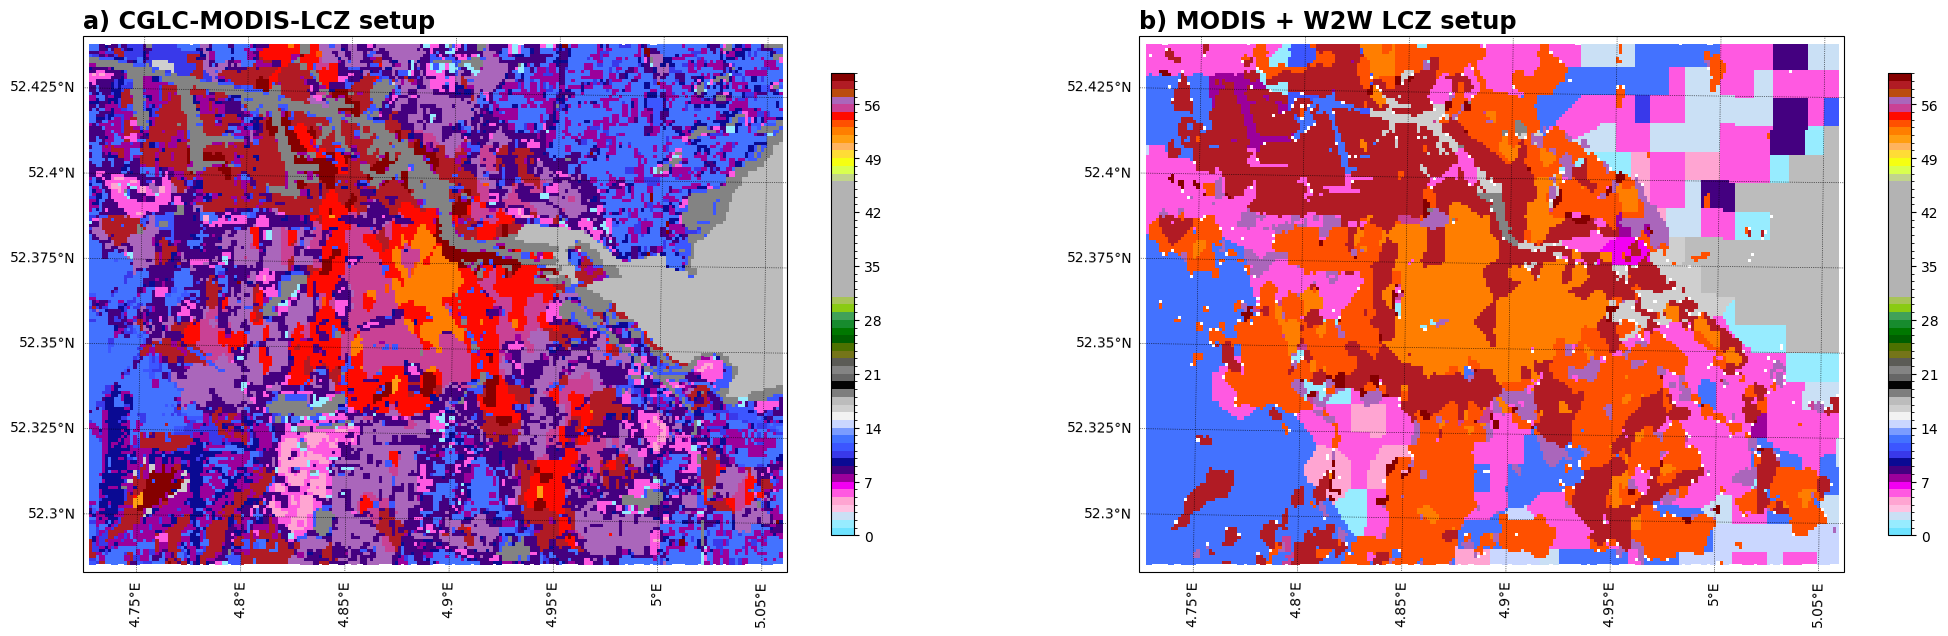

In [26]:
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1, projection=cart_proj)
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)
ct1 = ax1.pcolormesh(
    lon, lat, modis_var, cmap=cmap2, norm=norm2, transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax1.set_title('a) CGLC-MODIS-LCZ setup', **title_options)
cbar1 = fig.colorbar(ct1, ax=ax1, shrink=0.6)
#cbar1.ax.set_yticklabels(labels)

ax2 = fig.add_subplot(1, 2, 2, projection=cart_proj)
gl2 = ax2.gridlines(**ax_options)
gl2.right_labels = False
gl2.top_labels = False
ax2.set_extent(extent)
ct2 = ax2.pcolormesh(
    lon, lat, w2w_var, cmap=cmap2, norm=norm2, transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax2.set_title('b) MODIS + W2W LCZ setup', **title_options)
cbar2 = fig.colorbar(ct2, ax=ax2, shrink=0.6)

#### Compare CGLC-Modis-LCZ to USGS with Summer in the City refinement

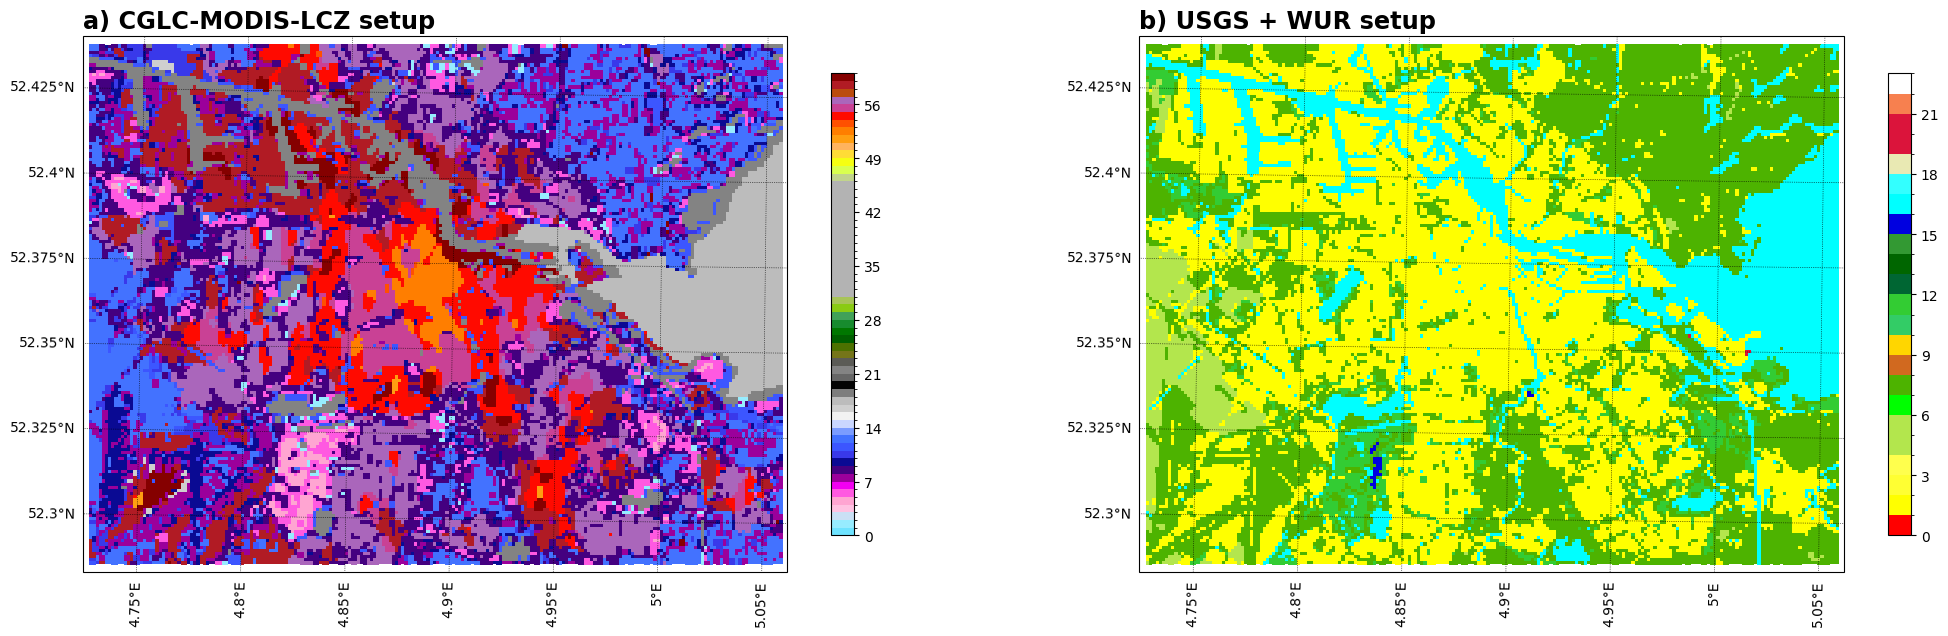

In [27]:
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1, projection=cart_proj)
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)
ct1 = ax1.pcolormesh(
    lon, lat, modis_var, cmap=cmap2, norm=norm2, transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax1.set_title('a) CGLC-MODIS-LCZ setup', **title_options)
cbar1 = fig.colorbar(ct1, ax=ax1, shrink=0.6)
#cbar1.ax.set_yticklabels(labels)

ax2 = fig.add_subplot(1, 2, 2, projection=cart_proj)
gl2 = ax2.gridlines(**ax_options)
gl2.right_labels = False
gl2.top_labels = False
ax2.set_extent(extent)
ct2 = ax2.pcolormesh(
    lon, lat, wur_var, cmap=cmap, norm=norm, transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax2.set_title('b) USGS + WUR setup', **title_options)
cbar2 = fig.colorbar(ct2, ax=ax2, shrink=0.6)

#### Compare URBAN_PARAMs 

CGLC-MODIS-MCZ with WUR parameters and USGS WUR setup to make sure that they are the same and including them has worked. 

In [34]:
import xarray as xr

modis = xr.open_dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur/geo_em.d04.nc')
usgs = xr.open_dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur_lcz/geo_em.d04.nc')

Text(0.0, 1.0, 'b) USGS + WUR setup')

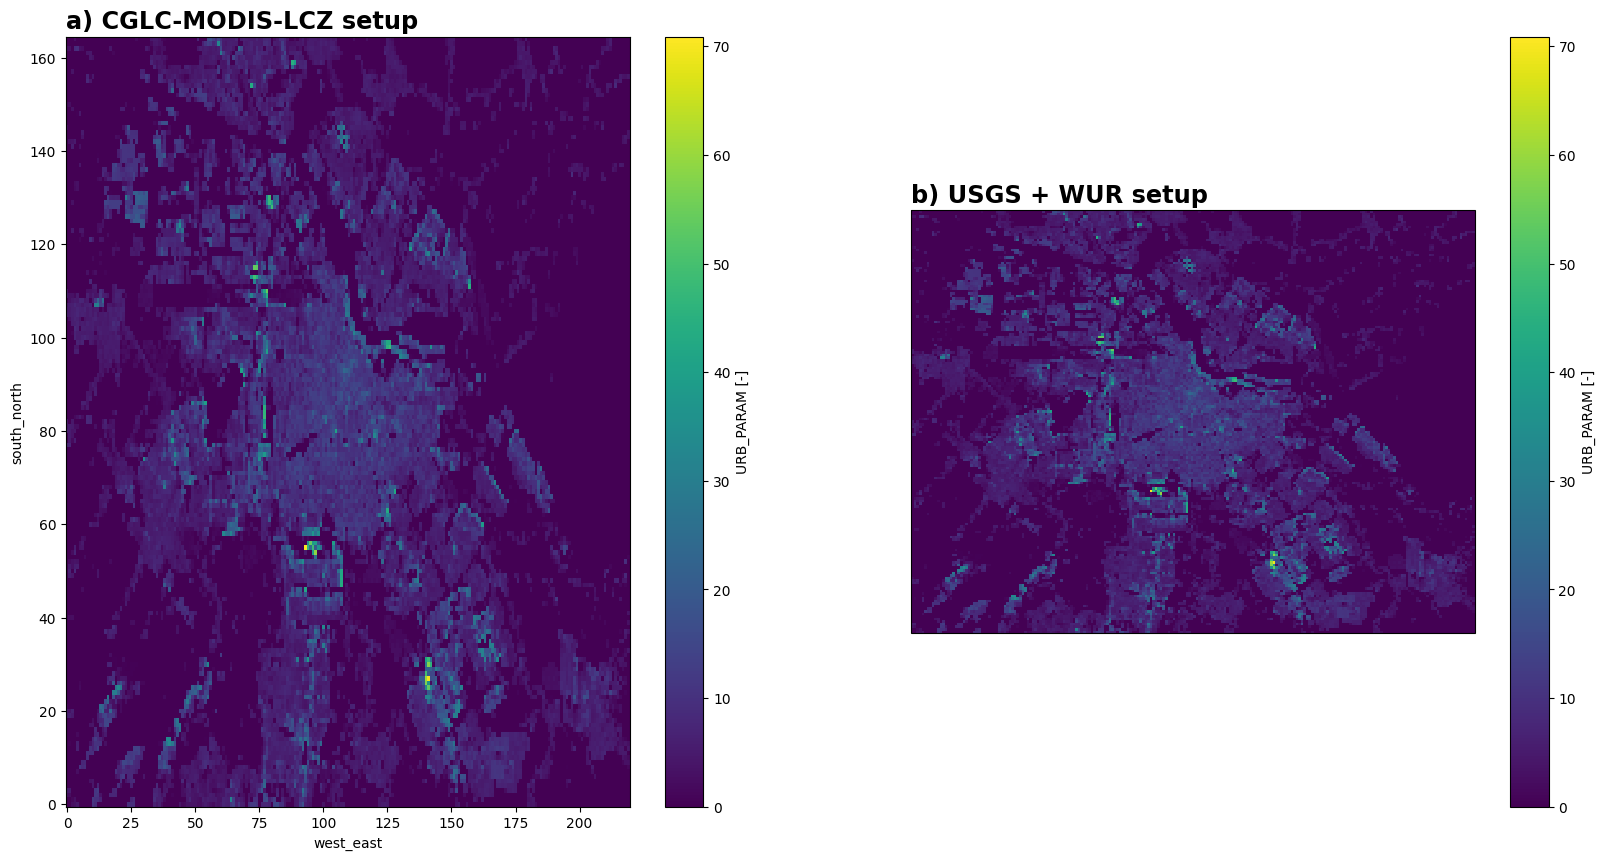

In [41]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
modis.URB_PARAM.isel(num_urb_params = 91).plot()
ax1.set_title('a) CGLC-MODIS-LCZ setup', **title_options)

ax2 = fig.add_subplot(1, 2, 2, projection=cart_proj)
usgs.URB_PARAM.isel(num_urb_params = 91).plot()
ax2.set_title('b) USGS + WUR setup', **title_options)